In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import FlatLambdaCDM
cos_flat = FlatLambdaCDM(H0=70, Om0=0.3)
cos_flat.age
df=pd.read_excel('../desktop/sfh.xlsx') # loading in variable df


In [38]:
df.head(0)

,#Avg_scale_factor,<SFH_all>,Err+,Err-,<SFH_SF>,Err+.1,Err-.1,<SFH_Q>,Err+.2,Err-.2,<SFH_Cen>,Err+.3,Err-.3,<SFH_Sat>,Err+.4,Err-.4,Scale_factor_begin,Scale_factor_end


In [42]:
df['z_begin'] = 1/df.Scale_factor_begin - 1
df['z_end'] = 1/df.Scale_factor_end - 1
df['Avg_scale_factor']=(df.Scale_factor_begin+df.Scale_factor_end)/2
df['z'] = 1/df.Avg_scale_factor - 1
df['age_begin'] = cos_flat.age(z=df.z_begin)*1e9
df['age_end'] = cos_flat.age(z=df.z_end)*1e9
df['age_avg']=(df['age_begin']+df['age_end'])/2
df['age_avg'] = cos_flat.age(z=df.z)*1e9
df['time'] = df.age_end - df.age_begin
df['mass_sf'] = df['<SFH_all>'] * df.time
df['mass_cummulative'] = df.mass_sf.cumsum()
df1125 = df.copy(deep=True)

Text(0, 0.5, 'M*')

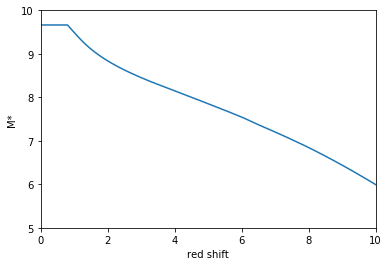

In [46]:
plt.plot(df1125.z,np.log10(df1125.mass_cummulative), label='log Mhalo/Msun=11.25')
plt.xlim(0.,10.)
plt.ylim(5.,10.)
plt.xlabel ('red shift')
plt.ylabel('M*')

In [52]:
np.log10(df1125.mass_cummulative)[60:100],df1125.z[60:100]

(60    8.708903
 61    8.731289
 62    8.753422
 63    8.775344
 64    8.797101
 65    8.818682
 66    8.840145
 67    8.861479
 68    8.882583
 69    8.903553
 70    8.924365
 71    8.945042
 72    8.965620
 73    8.986097
 74    9.006556
 75    9.026934
 76    9.047243
 77    9.067477
 78    9.087598
 79    9.107711
 80    9.127757
 81    9.147831
 82    9.167838
 83    9.187819
 84    9.207678
 85    9.227521
 86    9.247307
 87    9.266963
 88    9.286543
 89    9.305974
 90    9.325331
 91    9.344584
 92    9.363725
 93    9.382704
 94    9.401490
 95    9.420045
 96    9.438392
 97    9.456475
 98    9.474248
 99    9.491738
 Name: mass_cummulative, dtype: float64, 60    2.292880
 61    2.238887
 62    2.186642
 63    2.136050
 64    2.087039
 65    2.039541
 66    1.993479
 67    1.948791
 68    1.905418
 69    1.863299
 70    1.822387
 71    1.782632
 72    1.743977
 73    1.706382
 74    1.669803
 75    1.634196
 76    1.599529
 77    1.565767
 78    1.532867
 79    1.500797


In [13]:
clear

In [14]:
clear